In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import os
from keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


Using TensorFlow backend.


In [2]:
DATASET_PATH  = 'C:\\Users\\lyh51\\Desktop\\Desktop\\UVA\\MSDS\\용민이형\\AEnotebook\\face'
# data 
IMAGE_SIZE    = (200, 200)

NUM_CLASSES   = 2
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory


nb_train_samples = 50
nb_validation_samples = 10
nb_epoch = 1
batch_size = 32

# Convolutional Autoencoder with updating weights

### - function for changing the weight

In [3]:
layer_num = 1
sigma = 0.01

def change_weight(layer_num, sig):
    
    # get the weight matrix for the first layer
    weights = autoencoder.layers[layer_num].get_weights()[0]
    # get the weight matrix for the bias 
    second = autoencoder.layers[layer_num].get_weights()[1]
    
    # In this example, there are total 3x3 arrays of 16 weights
    # it looks like: 
    
    # 16  16  16
    # 16  16  16
    # 16  16  16
    
    for i in range(len(weights[0])): # for each row 
        one = weights[i] 
        for s in range(len(one)): # for the each arrays of the each row
            two = one[s][0]
            for x in range(len(two)): # for the every weights in the arrays
                # update the weight values by using Gaussian by setting mu = weight, and sigma
                two[x] = np.random.normal(two[x], sig, 1)[0] 
    
    # combine the updated weights with the bias weights
    updated = [weights,second] 
    
    # update the weights in the autoencoder layer
    autoencoder.layers[1].set_weights(updated) 
    

    

# change weight. The arguments are (ith layer , sigma)
# change_weight(1,0.01)

In [5]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)

# dimensions of our images.
img_width, img_height = (200, 200)
train_data_dir = 'C:\\Users\\lyh51\\Desktop\\Desktop\\UVA\\MSDS\\용민이형\\AEnotebook\\face\\train'
validation_data_dir = 'C:\\Users\\lyh51\\Desktop\\Desktop\\UVA\\MSDS\\용민이형\\AEnotebook\\face\\valid'

nb_train_samples = 100
nb_validation_samples = 50
nb_epoch = 10
batch_size = 32

input_img = Input(shape=(img_width, img_height,1))

def encoder(input_img):
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

def decoder(encoded):
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (1, 1), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return decoded

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# display the weights of the first layer 
autoencoder.summary()
"""
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 200, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 8)       1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 8)         584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 8)         0         
__________

"\nx = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)\nx = MaxPooling2D((2, 2), border_mode='same')(x)\nx = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)\nx = MaxPooling2D((2, 2), border_mode='same')(x)\nx = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)\nencoded = MaxPooling2D((2, 2), border_mode='same')(x)\n\n# at this point the representation is (8, 4, 4) i.e. 128-dimensional\n\nx = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)\nx = UpSampling2D((2, 2))(x)\nx = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)\nx = UpSampling2D((2, 2))(x)\nx = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(x)\nx = UpSampling2D((2, 2))(x)\ndecoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same')(x)\n\nautoencoder = Model(input_img, decoded)\nautoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')\n"

### -Data load

In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        color_mode='grayscale')
"""
history= autoencoder.fit_generator(
        fixed_generator(train_generator),
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=fixed_generator(validation_generator),
        nb_val_samples=nb_validation_samples
        )
"""

Found 116 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


'\nhistory= autoencoder.fit_generator(\n        fixed_generator(train_generator),\n        samples_per_epoch=nb_train_samples,\n        nb_epoch=nb_epoch,\n        validation_data=fixed_generator(validation_generator),\n        nb_val_samples=nb_validation_samples\n        )\n'

In [7]:
def myGenerator(train_generator):

    while True:

        xy = train_generator.next() #or next(train_generator)
        yield (xy[0])
train_generator2 = myGenerator(train_generator)
validation_generator2 = myGenerator(validation_generator)

### Fit the autoencoder

In [67]:
epoch_num = 10
train_loss = []
val_loss = []
acc = []
val_acc = []

def autoencoder_updator(epochs=epoch_num):
    # intial changing weight
    change_weight(1,0.01)
    change_weight(1,0.02)

    # first epoch of fitting autoencoder
    autoencoder.fit_generator(
        fixed_generator(train_generator2),
        samples_per_epoch=nb_train_samples,
        nb_epoch=1,
        validation_data=fixed_generator(validation_generator2),
        nb_val_samples=nb_validation_samples
        )
    

    # save the weight for the first epoch of the model
    autoencoder.save_weights('face_weight.h5')

    
    # starting with 2nd epoch, the weights will be saved and loaded using for loop
    epoch_in = 2

    # 
    for i in range(epoch_num-1):
        print('Epoch number: %s'%(epoch_in))
    
        autoencoder.load_weights('face_weight.h5')
    
        # update the weight
        change_weight(1,0.01)
        change_weight(1,0.02)
    
        # fit the model once
        history= autoencoder.fit_generator(
            fixed_generator(train_generator2),
            samples_per_epoch=nb_train_samples,
            nb_epoch=1,
            validation_data=fixed_generator(validation_generator2),
            nb_val_samples=nb_validation_samples
            )
    
        # save the model weight
        autoencoder.save_weights('face_weight.h5')
        
        # store cost
        train_loss.append(history.history['loss'][0])
        val_loss.append(history.history['val_loss'][0])
        #acc.append(history['acc'])
        #val_acc.append(history['val_acc'])
    
        epoch_in += 1


In [110]:
autoencoder_updator()

C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., steps_per_epoch=100, epochs=1, validation_steps=50)`


Epoch 1/1


ValueError: Error when checking input: expected input_7 to have shape (1, 200, 200) but got array with shape (200, 200, 1)

In [59]:
#import pandas as pd
#pd.DataFrame({'train_loss':train_loss,'val_loss':val_loss}).to_csv('loss.csv',index=False)

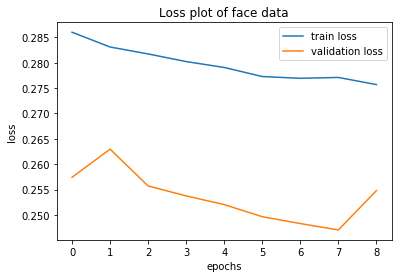

In [62]:
plt.plot([i for i in range(0,epoch_num-1)], train_loss, label='train loss')
plt.plot([i for i in range(0,epoch_num-1)], val_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot of face data')
plt.legend()

In [ ]:
# input_data = input_data.reshape((-1, image_side1, image_side2, channels))

In [113]:
img = validation_generator[0][0][1].reshape((-1,200,200,1)) # Get one image
dec = autoencoder.predict(img[0]) # Decoded image


ValueError: Error when checking input: expected input_8 to have 4 dimensions, but got array with shape (200, 200, 1)

In [83]:
img = validation_generator[0][0][5].reshape((-1,200,200,1)) # Get one image
dec = autoencoder.predict(img) # Decoded image
img = img[0]
dec = dec[0]

plt.imshow(np.hstack((img, dec)))
plt.title('Original and reconstructed images')
plt.show()

array([[[0.5818361 ],
        [0.7625648 ],
        [0.7625648 ],
        ...,
        [0.49631572],
        [0.49631572],
        [0.49482366]],

       [[0.6100849 ],
        [0.63756853],
        [0.63756853],
        ...,
        [0.49834403],
        [0.49834403],
        [0.49708226]],

       [[0.6100849 ],
        [0.63756853],
        [0.63756853],
        ...,
        [0.49834403],
        [0.49834403],
        [0.49708226]],

       ...,

       [[0.72316194],
        [0.4556768 ],
        [0.4556768 ],
        ...,
        [0.07552904],
        [0.07552904],
        [0.0819644 ]],

       [[0.72316194],
        [0.4556768 ],
        [0.4556768 ],
        ...,
        [0.07552904],
        [0.07552904],
        [0.0819644 ]],

       [[0.5033241 ],
        [0.42741302],
        [0.42741302],
        ...,
        [0.75142074],
        [0.75142074],
        [0.7167925 ]]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


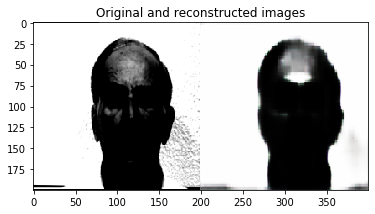

In [75]:
img = valid_batches[0][0][15].reshape((-1,200,200,3)) # Get one image
dec = autoencoder.predict(img) # Decoded image
img = img[0]
dec = dec[0]

plt.imshow(np.hstack((img, dec)))
plt.title('Original and reconstructed images')
plt.show()

In [81]:
input_img = Input(shape=( img_width, img_height,3))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 1, 1, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.load_weights('face_weight.h5')


C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  after removing the cwd from sys.path.
C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
  """
C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  
C:\Users\lyh51\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="re

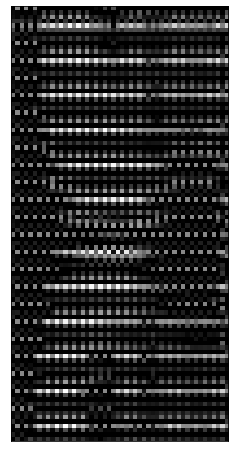

In [85]:
# extracting only encoder and pulling out the encoded imgs
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict( valid_batches[0][0][5].reshape((-1,200,200,3)))

# encoded representation
n = 1
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    #plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.imshow(encoded_imgs[i].reshape(50, 100).T) # 128 
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('face_encoded.png')
plt.show()

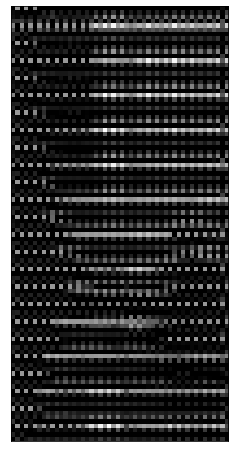

In [86]:
# extracting only encoder and pulling out the encoded imgs
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict( valid_batches[0][0][15].reshape((-1,200,200,3)))

# encoded representation
n = 1
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    #plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.imshow(encoded_imgs[i].reshape(50, 100).T) # 128 
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('face_encoded.png')
plt.show()

# Image classification

In [113]:
# encoder that has same architecture from original autoencoder
def encoder(input_img):
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

# fully connected layers
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(1, activation='sigmoid')(den)
    return out

encode = encoder(input_img)
full_model = Model(input_img,fc(encode))


# change the encoder weights to trained encoder weights
for l1,l2 in zip(full_model.layers[:7],autoencoder.layers[0:7]):
    l1.set_weights(l2.get_weights())
    
    
# freeze the encoder layers. We don't want them to be updated
for layer in full_model.layers[0:7]:
    layer.trainable = False

full_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 100, 100, 8)       1160      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 50, 50, 8)         584       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 25, 25, 8)         0         
__________

In [118]:
history2 = full_model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples// batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples // batch_size)

Epoch 1/10
3/3 [==============================] - 1s 278ms/step - loss: 0.5972 - acc: 0.9629 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 295ms/step - loss: 1.0074 - acc: 0.9375 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 3/10
3/3 [==============================] - 1s 229ms/step - loss: 0.9450 - acc: 0.9414 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 259ms/step - loss: 1.1189 - acc: 0.9306 - val_loss: 0.5037 - val_acc: 0.9688
Epoch 5/10
3/3 [==============================] - 1s 227ms/step - loss: 0.7711 - acc: 0.9522 - val_loss: 2.1491 - val_acc: 0.8667
Epoch 6/10
3/3 [==============================] - 1s 297ms/step - loss: 1.0074 - acc: 0.9375 - val_loss: 1.0074 - val_acc: 0.9375
Epoch 7/10
3/3 [==============================] - 1s 252ms/step - loss: 0.5972 - acc: 0.9629 - val_loss: 1.0745 - val_acc: 0.9333
Epoch 8/10
3/3 [==============================] - 1s 257ms/step - loss: 1.3684 - a

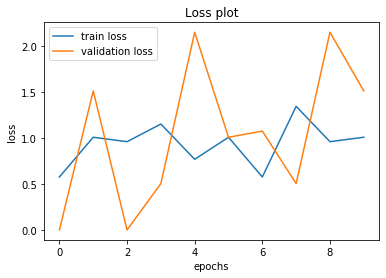

In [119]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot')
plt.legend()

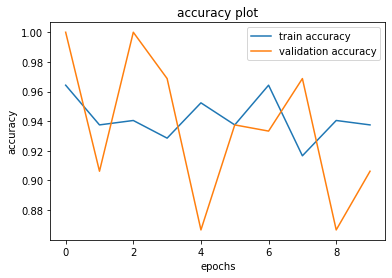

In [120]:
plt.plot(history2.history['acc'], label='train accuracy')
plt.plot(history2.history['val_acc'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend()


In [64]:
import pandas as pd
pd.DataFrame({'val_loss':history2.history['val_loss'],
             'val_accuracy':history2.history['val_acc'],
             'train_loss':history2.history['loss'],
             'train_accuracy':history2.history['acc']}).to_csv('classification.csv',index=False)